<a href="https://colab.research.google.com/github/mertkarahan955/CENG463-HW/blob/hw1-ecenaz/G01_CENG463_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Data Loading and Exploratory Data Analysis


**1. Download and Load the Dataset**



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [ ]:
#Task: Load the dataset
#load the data by the link
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
data = pd.read_csv(url, header=None)  # there is no column name in the dataset, thus we use "header=None"
#data.shape

In [ ]:
#Data seperation problem checked
data = pd.read_csv(url, header=None, sep=",")
# define column names
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
data.columns = columns


In [ ]:
#Task:display the first few rows using data.head()
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [ ]:
#replaces "?" with nan for finding null values in data
data = data.replace(["?", " "], np.nan)

In [ ]:
#Task: Check for any missing values in the dataset.
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [ ]:
#replaced nan values with column's mean to avoid future porblems
data = data.apply(pd.to_numeric, errors='coerce')
data = data.fillna(data.mean())

In [ ]:
#checked null values again
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
data.head(10) #we changed the data, thus printed the head again

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


**2. Identify the Features and Target Variable**

In [ ]:
#Task: Extract the features from the dataset
X = data.drop(columns=["num"])

#Task: Extract target variable from the dataset
Y = data["num"]

#Task: Print the names of all the feature columns and the target column.
print("Features (X):")
print(X.head())
print("\nTarget Variable (Y):")
print(Y.head())

Features (X):
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  
0    3.0  0.0   6.0  
1    2.0  3.0   3.0  
2    2.0  2.0   7.0  
3    3.0  0.0   3.0  
4    1.0  0.0   3.0  

Target Variable (Y):
0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64


# Task 2: Correlation Analysis

**1. Define the Pearson Correlation Function**

In [ ]:
#Task: Implement this formula in a Python functin named pearson_correlation.
# The function should take two arrays, x and y, and return the Pearson correlation coefficient.

def pearson_correlation(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_x_sq = sum(x**2)
    sum_y_sq = sum(y**2)
    sum_xy = sum(x * y)

    # we calculated numerator and denominator seperately to avoid zero division error
    numerator = (n * sum_xy) - (sum_x * sum_y)
    denominator = ((n * sum_x_sq - sum_x**2) * (n * sum_y_sq - sum_y**2))**0.5
    # avoid zero division error
    if denominator == 0:
        return 0

    result = numerator / denominator
    return result


**2. Compute Correlations Between Each Feature and the Target**

In [ ]:
#Task: Calculate correlations and store in a dictionary
correlations = {}
for column in X.columns:
    correlations[column] = pearson_correlation(X[column], Y)


**3. Filter Features Based on a Correlation Threshold**

In [ ]:
#Task:Filter features based on a threshold value (given as 0.3)
threshold = 0.3
selected_features = {}
for feature, corr in correlations.items():
    if abs(corr) > threshold:
        selected_features[feature] = corr

#Task: Print the features with strong correlation
#We only want to consider features with an absolute correlation coefficient greater than 0.3.
print("\nFeatures with abs correlation > 0.3:")
for feature, corr in selected_features.items():
    print(f"{feature}: {corr:.6f}")


Features with abs correlation > 0.3:
cp: 0.407075
thalach: -0.415040
exang: 0.397057
oldpeak: 0.504092
slope: 0.377957
ca: 0.517390
thal: 0.508799


**4. Find the Most Correlated Feature**

In [ ]:
#Task: Find the most correlated feature
most_correlated_feature = max(selected_features, key=lambda k: abs(selected_features[k])) #calculated max with absolute value
print(f"\nMost correlated feature: {most_correlated_feature} ({selected_features[most_correlated_feature]:.6f})")


Most correlated feature: ca (0.517390)


# Task 3: Simple Linear Regression


**1. Create the Linear Regression Function:**

In [ ]:
def linear_regression(x, y):
    # Convert y to numeric, handling errors by coercing to NaN
    X = pd.to_numeric(x, errors='coerce')
    Y = pd.to_numeric(y, errors='coerce')

    x_mean = X.mean()
    y_mean = Y.mean()

    # slope (b_1) calculations
    numerator = sum((X - x_mean) * (Y - y_mean))
    denominator = sum((X - x_mean) ** 2)

    # avoid zero division error
    if denominator == 0:
        return 0, 0
    b_1 = numerator / denominator

    #intercept (b_0) calculations
    b_0 = y_mean - (b_1 * x_mean)

    return b_0, b_1

**2. Calculate Regression Coefficients:**

In [ ]:
#Task: Apply the function to the feature and target variables, obtaining the intercept and slope
b_0, b_1 = linear_regression(X['thal'], Y)

#Task: Print the intercept and slope
print(f"Intercept (b0): {b_0:.6f}")
print(f"Slope (b1): {b_1:.6f}")

Intercept (b0): -0.593402
Slope (b1): 0.323326


**3. Generate Predictions:**

In [ ]:
#Task: using the coefficients predict y values for each input x
y_pred = b_0 + b_1 * X['thal']
print(y_pred)

0      1.346554
1      0.376576
2      1.669879
3      0.376576
4      0.376576
         ...   
298    1.669879
299    1.669879
300    1.669879
301    0.376576
302    0.376576
Name: thal, Length: 303, dtype: float64


**4. Visualize the Results:**

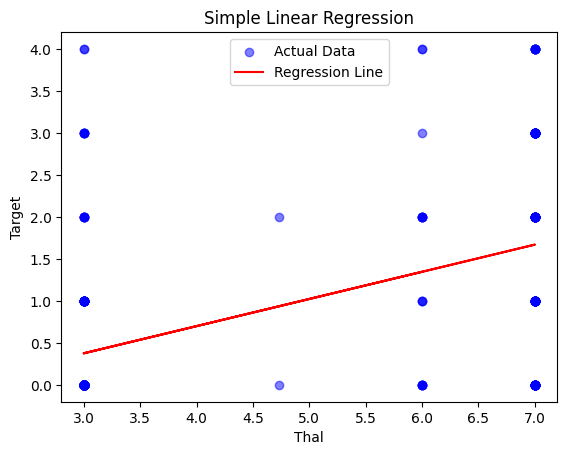

In [ ]:
#Task: Visualize the results
plt.scatter(X['thal'], Y, color="blue", label="Actual Data", alpha=0.5)
plt.plot(X['thal'], y_pred, color="red", label="Regression Line")
plt.xlabel("Thal")
plt.ylabel("Target")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

#Discussion of Task 3

**Performance of Simple Linear Regression Model:** The Simple Linear Regression Model is not a strong choice for this dataset. The model is not qualifed for capturing the complexity of the dataset, because it relies on only a single feature to predict the targer variable but the dataset has more complex relationship between multiple variables.

**Suitability:** Simple Linear Regression Model is not ideal for the dataset since the model relies on only one feature to make predictions.

**Metrics Comparision:** The Mean Squared Error for SLR is 1.114887, this error rate is relatively higher than other regression models (shown in tasks 4-5-6). Other models provide better performance for capturing the data.

**Visual Fit:** Visually, the model's regression line does not follow data points as expected. Although it provides a basit fit to data points, it does not closely follow the overall trend of the data.

# Task 4: Multiple Linear Regression

**1. Create the Multiple Linear Regression Function**

In [ ]:
def multiple_linear_regression(X, Y):
    #chech X is a 2D array
    if X.ndim == 1:
        X = X.reshape(-1, 1)  #if X is 1D reshape it to 2D

    # add ones column for intercet
    X = np.hstack((np.ones((X.shape[0], 1)), X))

  # transpose X for preparing it to Normal Equation
    X_transpose = np.transpose(X)

    normal_coefficient_beta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(Y)

    return normal_coefficient_beta

**2. Select futures with High Correlation**

In [ ]:



## get correalations dictionary from previous calculation
sorted_features = sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True)

# Select the top 5 most correlated features
top_5_features = dict(sorted_features[:5])


print("Top 5 most correlated features with the target:")
for feature, corr in top_5_features.items():
    print(f"{feature}: {corr:.2f}")


Top 5 most correlated features with the target:
ca: 0.52
thal: 0.51
oldpeak: 0.50
thalach: -0.42
cp: 0.41


**3. Calculate Regression Coefficients**

In [ ]:
# get values from X with respect to top 5 feature keys [ca, thal, oldpeak, thalach, cp]
X_selected = X[top_5_features.keys()].values

beta = multiple_linear_regression(X_selected, Y)

print("Regression Coefficients for the selected features:", beta)

Regression Coefficients for the selected features: [-0.19032269  0.40214055  0.17029545  0.26188128 -0.00624192  0.22563477]


**4. Generate Predictions**

In [ ]:
def generate_predictions(X, beta):
    #chech X is a 2D array
    if X.ndim == 1:
        X = X.reshape(-1, 1)  #if X is 1D reshape it to 2D

    # add ones column for intercet
    X_b = np.hstack((np.ones((X.shape[0], 1)), X))

    #calculate predictions using  given function on document
    y_pred = X_b.dot(beta)

    return y_pred

In [ ]:
#generate predictions using the selected features and calculated coefficients
predictions = generate_predictions(X_selected, beta)


print("Predicted target values:\n", predictions)

Predicted target values:
 [ 0.72312416  2.14821926  2.58424967  0.74681395  0.06485724 -0.12972303
  1.9714497   0.36279902  1.75549708  1.74861937  0.91493788  0.15726554
  1.18127142  0.37316335  0.79839985  0.33038444  0.66625422  0.53865354
  0.18221775 -0.13840586  0.11874867 -0.20311087  0.24451276  2.24109931
  2.51314767  0.43025511 -0.07614177  0.51551121  0.54855683  1.71646857
  0.87933634  2.0764927   0.01124507  1.03027654 -0.01508268  0.11204149
  1.80995771  1.59416371  1.79674958  0.40420661  2.66100893  0.48295278
  0.66967623  0.43649703  0.16821875  1.70557721  0.38684094  1.7862105
  0.62913255  0.36295411  0.12533167  1.13516868  0.67022997 -0.40164722
  1.77422283  2.20219496  1.22048661  0.91806165  0.58177776  0.53473313
  1.33218986  0.36539502  2.86915387 -0.06365794  1.96772227  2.55548101
  0.81561466  1.06774351  1.92081251  1.02267876  0.28316926  1.74350942
  2.56200217  1.70917606  0.52042396  0.26444351  2.15958238  0.90607821
 -0.29933563  1.42093679  

**5. Visualize the Results**

In [ ]:

def plot_actual_vs_predicted(actual, predicted):
    plt.figure()
    plt.scatter(actual, predicted, alpha=0.5, label="Predicted values")
    # given x and y spots for drawing the line

    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], color='red', label="Valid prediction line")

    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Actual vs Predicted Values")
    plt.legend()
    plt.show()

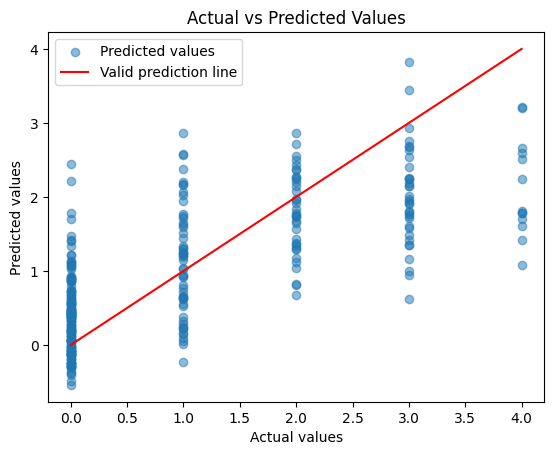

In [ ]:
plot_actual_vs_predicted(Y, predictions)

**6. Calcute Mean Squared Error(MSE)**

In [ ]:
def mean_squared_error(actual, predicted):
    mse = np.mean((actual - predicted) ** 2)
    return mse

**Calculate MSE for the multiple linear regression model**

In [ ]:
mse_multiple = mean_squared_error(Y, predictions)
print(f"Mean Squared Error (MSE) for multiple linear regression: {mse_multiple:.6f}")

Mean Squared Error (MSE) for multiple linear regression: 0.693729


**Calculate MSE for the simple linear regression model**

In [ ]:
mse_simple = mean_squared_error(Y, y_pred)
print(f"Mean Squared Error (MSE) for simple linear regression: {mse_simple:.6f}")

Mean Squared Error (MSE) for simple linear regression: 1.114887


# Discussion of Task 4

**Performance of Regression Model:** The Multiple Linear Regression (MLR) model performs better than the Simple Linear Regression (SLR) model. Because it uses the top 5  most correlated features with the target num; which helps for improve accuracy well.

**Suitability:** MLR is more suitable for this dataset because it uses multiple features rather than relying on a single feature, as SLR does.

**Metrics Comparison:** The Mean Squared Error (MSE) for SLR is 1.114887,for MLR is 0.693729. This decrease in error shows MLR gains more accurate fit by capturing more data with multiple features.

**Visual Fit:** Visually, MLR shows a closer line with the actual data points compared to SLR. Although SLR was using highest correlated feature, but in the end MLR’s use of multiple top related features allows it better capture the data and reduce error.


# Task 5: Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Task: Prepare Data for Logistic Regression

In [ ]:
X_lg = data[top_5_features.keys()]
Y_lg = Y

# we should check for Y is binary or not. For that, we need to compare with
# threshold value

Y_lg = Y_lg.apply(lambda y: 1 if y > 0.9 else 0)

# on book, it gives an example for random_state as 42.
X_lg_train, X_lg_test, Y_lg_train, Y_lg_test = train_test_split(X_lg, Y_lg, random_state = 42)

# for clarify what we've done
print("Training features shape:", X_lg_train.shape)
print("Testing features shape:", X_lg_test.shape)
print("Training target shape:", Y_lg_train.shape)
print("Testing target shape:", Y_lg_test.shape)

Training features shape: (227, 5)
Testing features shape: (76, 5)
Training target shape: (227,)
Testing target shape: (76,)


Task: Train Logistic Regression Model

In [ ]:
# get an instance of LogisticRegression class
# # setting C value to 100. In book it says "The default value of C=1 provides
# quite good performance, with 95% accuracy on both the training and the test
# set. But as training and test set performance are very close, it is likely
# that we are underfitting."
logistic_model = LogisticRegression(C=100, solver= 'lbfgs')

In [ ]:
logistic_model.fit(X_lg_train, Y_lg_train)


# with this output, we can change C value inside LogisticRegression class.
# because in book it says, If scores are close to each other it might go to
# underfitting.
scr_train = logistic_model.score(X_lg_train, Y_lg_train)
scr_test = logistic_model.score(X_lg_test, Y_lg_test)
print("Score Train:", scr_train)
print("Score Test:", scr_test)



Score Train: 0.8281938325991189
Score Test: 0.8157894736842105


Task: Evaluate the Model

In [ ]:
Y_lg_pred = logistic_model.predict(X_lg_test)

accuracy = accuracy_score(Y_lg_test, Y_lg_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8157894736842105


Task: Visualize the Results

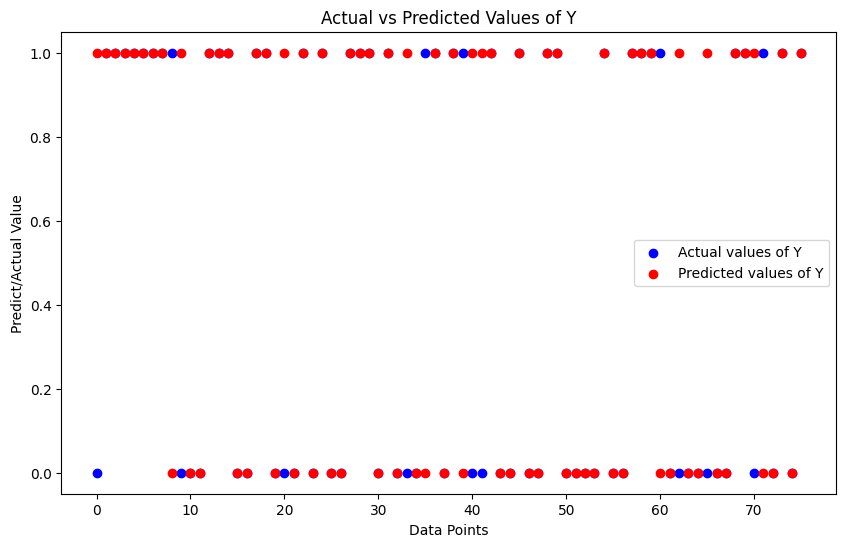

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(Y_lg_test)), Y_lg_test, color = 'blue', label = 'Actual values of Y')
plt.scatter(range(len(Y_lg_test)), Y_lg_pred, color = 'red', label = 'Predicted values of Y')
plt.xlabel("Data Points")
plt.ylabel("Predict/Actual Value")
plt.title("Actual vs Predicted Values of Y")
plt.legend()

plt.show()

# Discussion of Task 5

**Performance of Regression Model:** Logistic Regression Model achived good accuracy on the test data. It shows that for feature targets, it will work effectively.

**Suitability:** If we want a binary classification for our dataset, then this model is well suit for us. This dataset is not bad for logistic regression model, as we can see actual and predicted values are close each other and groups well.

**Metrics Comparison:** For training score it is 0.82 approximetly. For predicted score is 0.81 approximetly. It indicates prediction of model gives similar performance compare to training set. It is not really low or not same, this shows that we achived good regularization.

**Visual Fit:** Visually, predicted values and actual values align eachother closely for most data points. It shows good classification. Model miss some actual values on minimal parts. Which shows it is not overfitted actually.

# Task 6: Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Task: Transform the Feature into Polynomial Features

In [ ]:
# highest correlation feature
most_correlated_feature = 'thal'

# for fitting the data later, we are using 2D
X = data[[most_correlated_feature]].values

degree = 3
print(X[:5])
polynomial = PolynomialFeatures(degree=degree)
X_poly = polynomial.fit_transform(X)


[[6.]
 [3.]
 [7.]
 [3.]
 [3.]]


Task: Train a Polynomial Regression Model

In [ ]:
Y = data["num"].values

X_poly_train, X_poly_test, Y_train, Y_test = train_test_split(X_poly, Y, random_state=42)

polynomial_model = LinearRegression()
polynomial_model.fit(X_poly_train, Y_train)

Y_pred = polynomial_model.predict(X_poly_test)


Task: Evalueate the Model

In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.6f}")

Mean Squared Error (MSE): 1.077291


Task: Visualize the Results

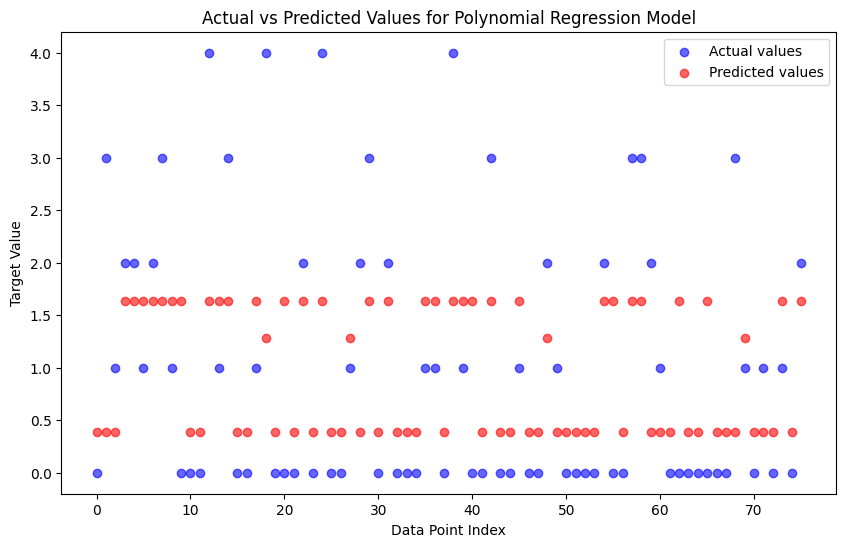

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual values', alpha=0.6)
plt.scatter(range(len(Y_test)), Y_pred, color='red', label='Predicted values', alpha=0.6)
plt.xlabel("Data Point Index")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values for Polynomial Regression Model")
plt.legend()

plt.show()

# Discussion of Task 6

**Performance of Regression Model:** We used highest correlated feature 'thal' as in simple linear regression. But we transformed it into third degree polynomial features.  So with this approach, we can capture nonlinear coefficients also. And with this capture model fit might increase.

**Suitability:** With using polynomial regression, we achieved a nonlinear relationship between feature and target. With transforming feature to polynomial terms, model fit cover more complex datas. But, if we increase the degree too much or decrease too much, it can lead to overfitting or underfitting respectfully.
**Metrics Comparison:** MSE of Polynomial Regression model is smallest value compared with Simple Linear Regression and Multiple Linear Regression models.

**Visual Fit:** Actual vs Predicted values illustrates that the polynomial regression model’s predictions (in red) align more closely with the actual values compared to previous linear models. distribution of red points around the blue values suggests that the model captures variations in the target across different data points effectively. However, there are some still deviations which indicates that still there is some complexity of the model.